# Semana 1 del curso intensivo de Cosmología  - CMB

Del 25 de marzo al 4 de abril de 2025 - DF-FCFyN-UBA

Prof. Claudia Scóccola
Departamento de Física, Facultad de Ciencias Físicas y Matemáticas, Universidad de Chile

---

## Práctica 1

---

#### Ejercicio 0 

Explorar superficialmente los tutoriales CAMBdemo.ipynb y tutorial_healpy.ipynb, que están en las carpetas CAMB/ y healpy/ del directorio CMB/ donde se aloja esta práctica 1.

Tenga como referencia estos tutoriales para realizar los ejercicios de la práctica.

#### Ejercicio 1

Explorar el tutorial CAMBdemo.ipynb para aprender cómo se utiliza el código para calcular los $C_ \ell$ y cómo se generan mapas a partir de estos espectros.

In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
import healpy as hp
from camb import model, initialpower

#### Ejercicio 2:

Elegir un conjunto de parámetros cosmológicos, y graficar los $C_\ell^{TT}$, $C_\ell^{EE}$, $C_\ell^{BB}$, $C_\ell^{TE}$. 

Notar que la salida de CAMB en realidad son los $D_\ell = \frac{\ell (\ell + 1)}{2 \pi} C_\ell$

In [2]:
#Definimos los parametros cosmologicos
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

#calculo los resultados
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

In [3]:
ells = np.arange(3051)  # l=0 a l=3051
Dl_TT = powers["total"][:, 0]  # TT
Dl_EE = powers["total"][:, 1]  # EE
Dl_BB = powers["total"][:, 2]  # BB (incluye lenteado)
Dl_TE = powers["total"][:, 3]  # TE


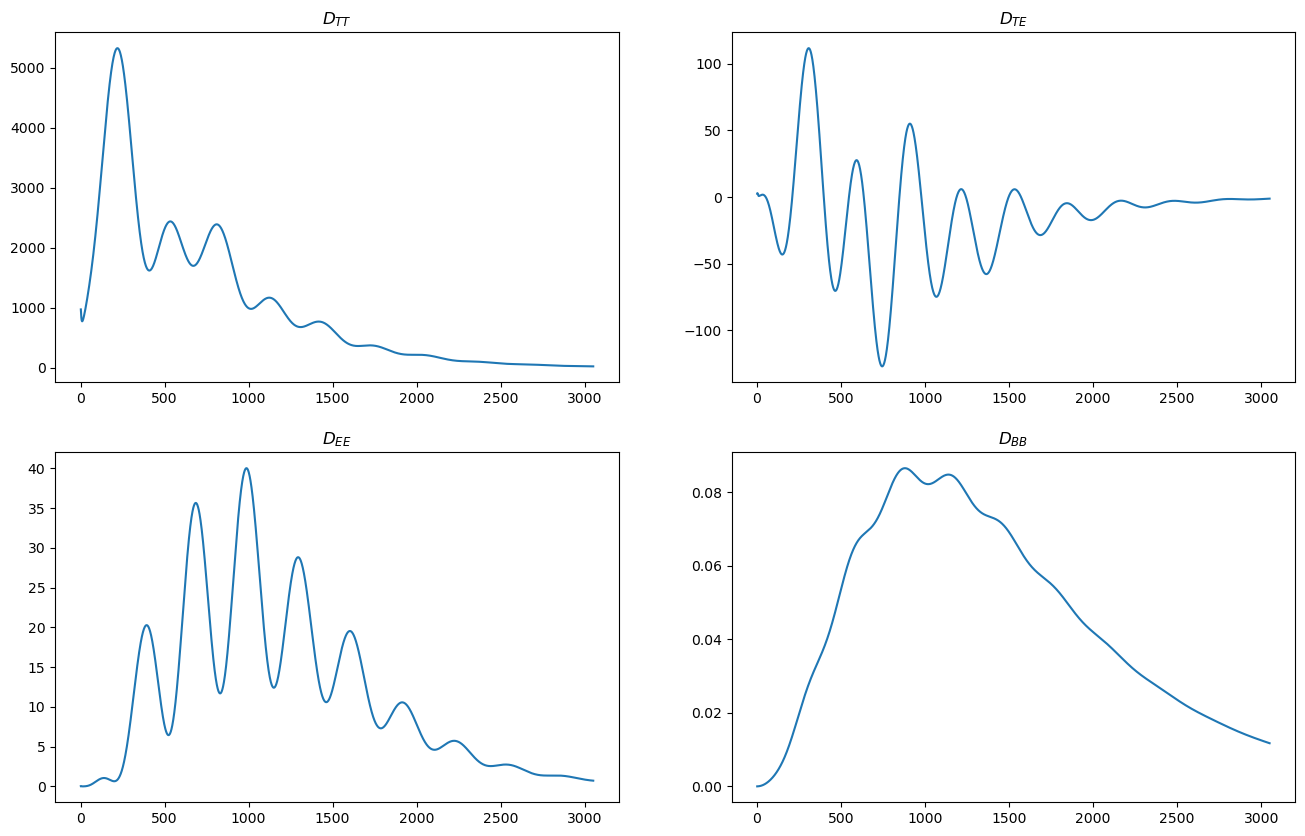

In [4]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(ells[2:], Dl_TT[2:])
plt.title(r'$D_{TT}$')

plt.subplot(2,2,2)
plt.plot(ells[2:], Dl_TE[2:])
plt.title(r'$D_{TE}$')

plt.subplot(2,2,3)
plt.plot(ells[2:], Dl_EE[2:])
plt.title(r'$D_{EE}$')

plt.subplot(2,2,4)
plt.plot(ells[2:], Dl_BB[2:])
plt.title(r'$D_{BB}$');

In [5]:
cl_TT = np.zeros(len(ells))
cl_EE = np.zeros(len(ells))
cl_BB = np.zeros(len(ells))
cl_TE = np.zeros(len(ells))

for i in range(1, len(ells)):
    cl_TT[i] = Dl_TT[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_EE[i] = Dl_EE[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_BB[i] = Dl_BB[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))
    cl_TE[i] = Dl_TE[i] * 2 * np.pi / (ells[i] * (ells[i] + 1))

cls = [cl_TT, cl_EE, cl_BB, cl_TE]

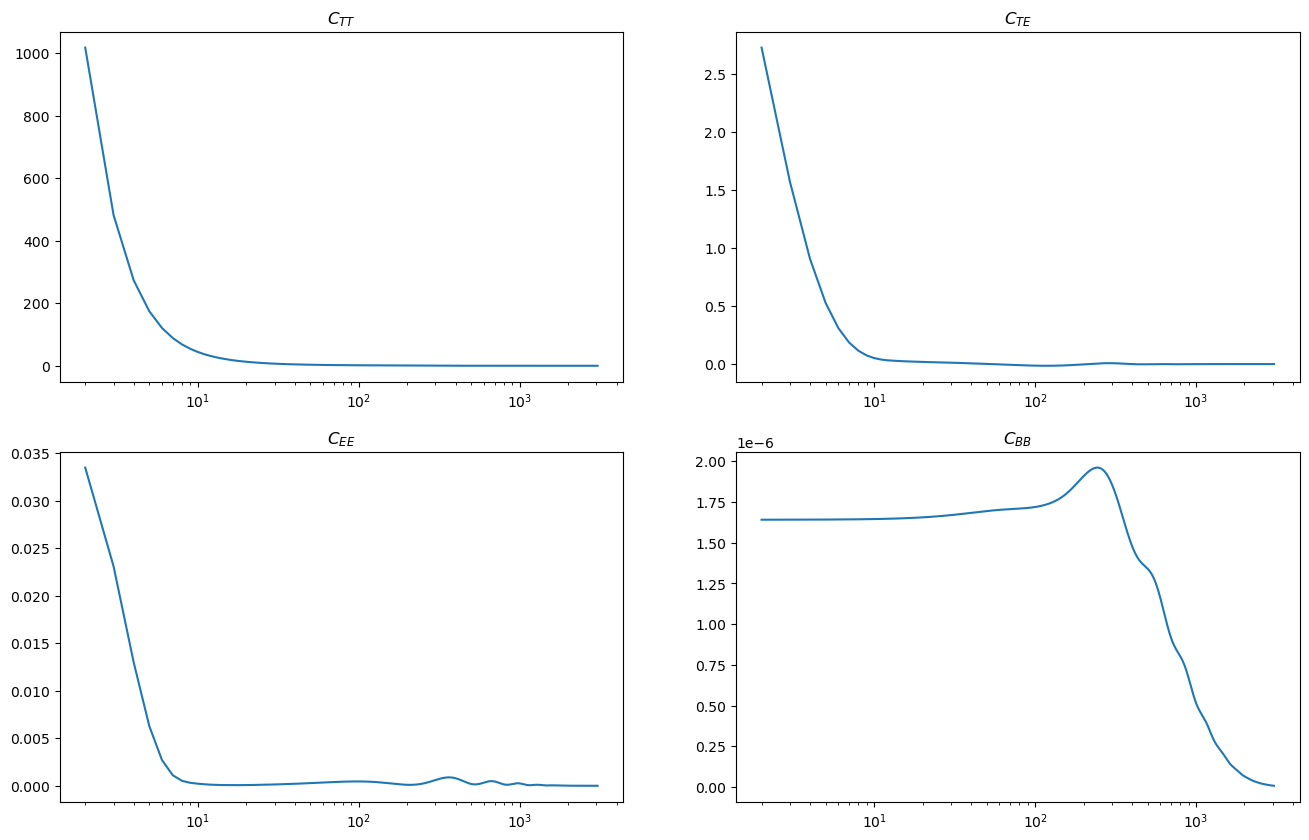

In [12]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(ells[2:], cl_TT[2:])
plt.title(r'$C_{TT}$')
plt.xscale('log'); #plt.yscale('log')

plt.subplot(2,2,2)
plt.plot(ells[2:], cl_TE[2:])
plt.title(r'$C_{TE}$')
plt.xscale('log'); #plt.yscale('log')

plt.subplot(2,2,3)
plt.plot(ells[2:], cl_EE[2:])
plt.title(r'$C_{EE}$')
plt.xscale('log'); #plt.yscale('log')

plt.subplot(2,2,4)
plt.plot(ells[2:], cl_BB[2:])
plt.title(r'$C_{BB}$')
plt.xscale('log'); #plt.yscale('log');

#### Ejercicio 3: 

Utilizando CAMB, crear una realización de mapas de CMB. Guarde el "seed" para poder reproducir la realización.


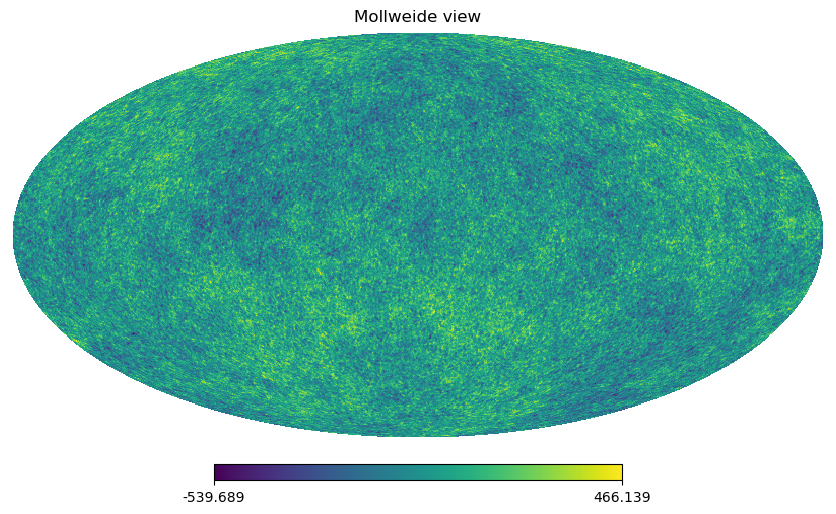

In [7]:
# Crear mapa con healpy (nside=64, polarización)
seed = 42
np.random.seed(seed)

nside = 64
NPIX = 12*nside
cmb_map = hp.synfast(
    cls, 
    nside=NPIX, 
    pol=True, 
    new=True
)

hp.mollview(cmb_map[0])

#### Ejercicio 4:

Vuelva a crear la misma realización de mapas de CMB, pero esta vez, con un beam distinto de cero, simulando el efecto de la PSF (point spread function) de un telescopio.

Repita con un FWHM más grande.



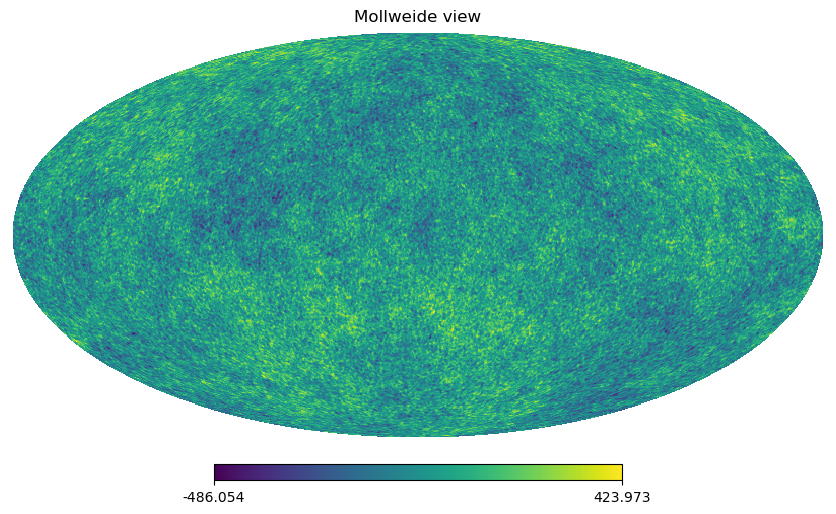

In [8]:
fwhm_deg_1 = 0.2  # Beam pequeño (ej. telescopio de alta resolución)
fwhm_rad_1 = np.radians(fwhm_deg_1)  # Convertir a radianes

cmb_smoothed_1 = hp.smoothing(
    map_in=cmb_map,
    fwhm=fwhm_rad_1,
    pol=True  # Aplica beam a T, Q, U
)
hp.mollview(cmb_smoothed_1[0])

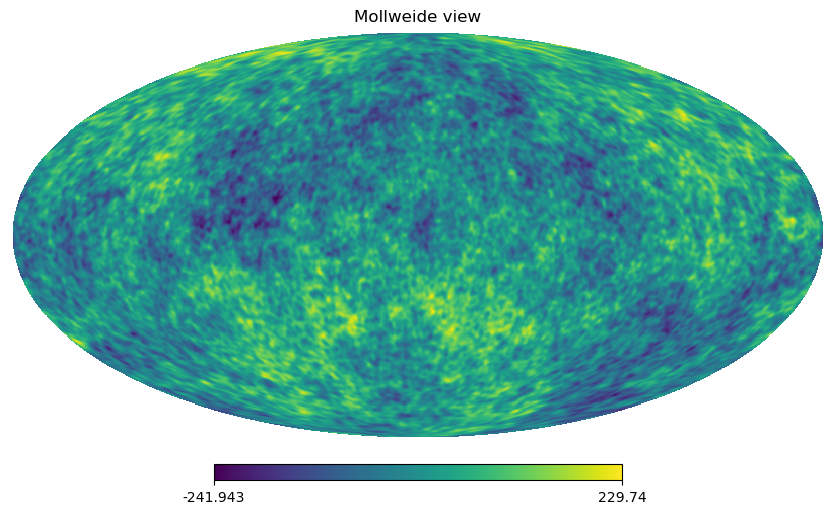

In [9]:

# 3. Aplicar beam más grande (FWHM=1.5 grados)
fwhm_deg_2 = 1.5  # Beam grande (ej. telescopio de baja resolución)
fwhm_rad_2 = np.radians(fwhm_deg_2)

cmb_smoothed_2 = hp.smoothing(
    map_in=cmb_map,
    fwhm=fwhm_rad_2,
    pol=True
)
hp.mollview(cmb_smoothed_2[0])

#### Ejercicio 5:

Calcular el espectro a partir del mapa, tanto en el caso de FWHM = 0, como en el caso distinto de cero. En este último caso, aplicar la corrección por beam.

In [10]:
LMAX = 1024
cl = hp.anafast(cmb_map, lmax=LMAX)
ell = np.arange(len(cl[0]))

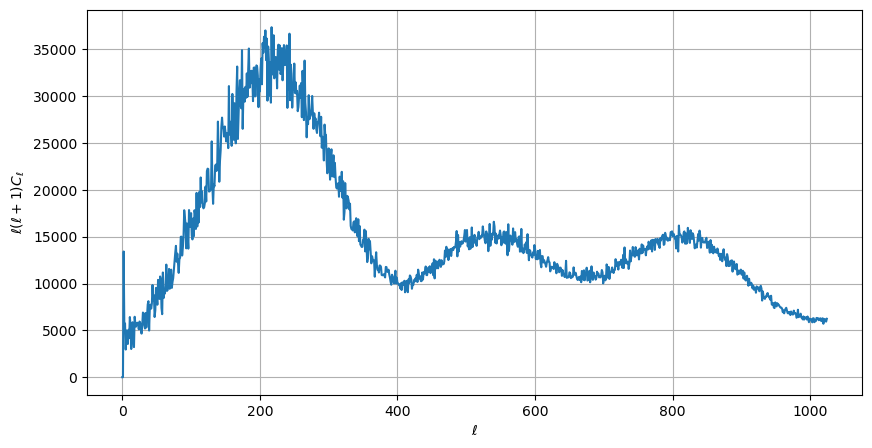

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl[0])
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()

In [1]:
seed = 42
np.random.seed(seed)

nside = 64
NPIX = 12*nside
cmb_map = hp.synfast(
    cl, 
    nside=NPIX, 
    pol=True, 
    new=True
)

hp.mollview(cmb_map[0])

NameError: name 'np' is not defined

#### Ejercicio 6:

Explore los otros tutoriales de healpy para crear una máscara, eligiendo cierta región del cielo. 

#### Ejercicio 7:

Aplique esa máscara al mapa de cielo del CMB que haya creado, y calcule el espectro de potencia. Describa las diferencias con el espectro de entrada. Cómo y en qué medida puede corregir el espectro con las herramientas vistas hasta ahora?